<a href="https://colab.research.google.com/github/anjum-kousar-aiml/Diabetes-Prediction_-Random-Forest-VS-SVM/blob/main/SVM_vs_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***SVM vs Random Forest***
### **Importing libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Collection and Analysis**

In [ ]:
# Load the diabetes dataset
# Update the path to the location of your dataset file
diabetes_df = pd.read_excel('/content/diabetes.xls')

In [ ]:
print(diabetes_df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
# Display the first 5 rows to understand the data structure
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# printing the last 5 rows of the dataset
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Inspect the dataset columns and datatypes
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Displaying the shape of the diabetes_df DataFrame
diabetes_df.shape

(768, 9)

In [ ]:
# Generating descriptive statistics for the diabetes_df DataFrame
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check for missing values in the diabetes_df DataFrame
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
# Split the dataset into features and target variable
X = diabetes_df.drop(columns='Outcome')
y = diabetes_df['Outcome']

**splitting the Dataset**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ***Random Forest Classifier***

In [ ]:
# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Train the Random Forest model on the training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the outcomes on the testing data using Random Forest
y_pred_rf = rf_clf.predict(X_test)

***Metrics***

In [ ]:
# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


In [ ]:
# Print metrics for Random Forest
print('Random Forest Metrics:')
print(f'Accuracy: {accuracy_rf * 100:.2f}%')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1-score: {f1_rf:.2f}')
print('Confusion Matrix:')
print(conf_matrix_rf)

Random Forest Metrics:
Accuracy: 72.08%
Precision: 0.61
Recall: 0.62
F1-score: 0.61
Confusion Matrix:
[[77 22]
 [21 34]]


***Confusion Matrix***

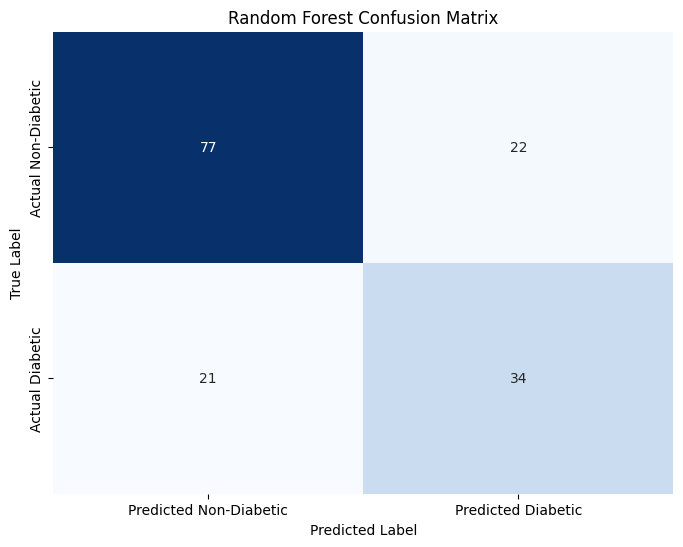

In [ ]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### ***Support Vector Machine***

In [ ]:
# Create an SVM classifier with hyperparameter tuning
param_grid = {'C': [0.1, 1, 10 ], 'kernel': ['linear', 'rbf']}
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)
svm_clf = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

In [ ]:
# Train the SVM model on the training data
svm_clf.fit(X_train_sub, y_train_sub)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
# Predict the outcomes on the testing data using SVM
y_pred_svm = svm_clf.predict(X_test)

***Metrics***

In [ ]:
# Calculate metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)


In [ ]:
# Print metrics for SVM
print('SVM Metrics:')
print(f'Accuracy: {accuracy_svm * 100:.2f}%')
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')
print(f'F1-score: {f1_svm:.2f}')
print('Confusion Matrix:')
print(conf_matrix_svm)

SVM Metrics:
Accuracy: 68.83%
Precision: 0.56
Recall: 0.64
F1-score: 0.59
Confusion Matrix:
[[71 28]
 [20 35]]


### ***Confusion Matrix***

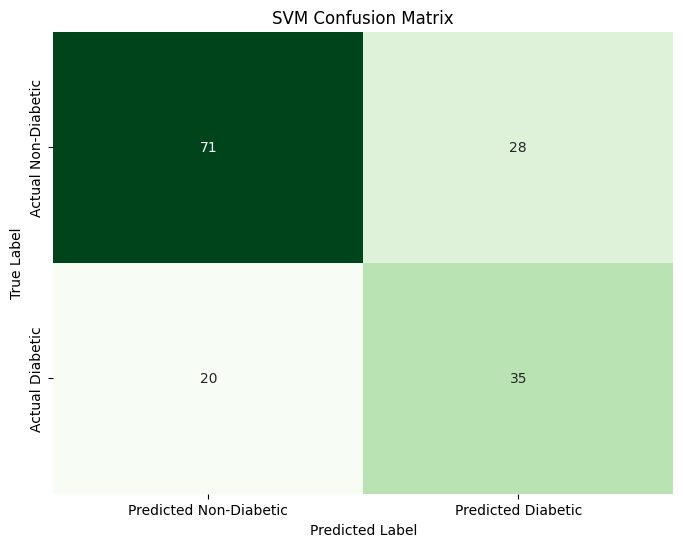

In [ ]:
# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Greens', fmt='g', cbar=False,
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

***Input New Data***

In [ ]:
# Now, let's input new data and make predictions with both models
new_data = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [120],
    'BloodPressure': [70],
    'SkinThickness': [20],
    'Insulin': [79],
    'BMI': [25.6],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [32]
})
# Predict the outcome for the new input data using Random Forest
new_prediction_rf = rf_clf.predict(new_data)

# Predict the outcome for the new input data using SVM
new_prediction_svm = svm_clf.predict(new_data)

# Print the predictions for the new data
print(f'Random Forest Prediction for the new data: {new_prediction_rf[0]}')
print(f'SVM Prediction for the new data: {new_prediction_svm[0]}')


Random Forest Prediction for the new data: 0
SVM Prediction for the new data: 0


In [ ]:
new_data = pd.DataFrame({
    'Pregnancies': [10],
    'Glucose': [100],
    'BloodPressure': [62],
    'SkinThickness': [36],
    'Insulin': [0],
    'BMI': [41.5],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [32]
})
# Predict the outcome for the new input data using Random Forest
new_prediction_rf = rf_clf.predict(new_data)

# Predict the outcome for the new input data using SVM
new_prediction_svm = svm_clf.predict(new_data)

# Print the predictions for the new data
print(f'Random Forest Prediction for the new data: {new_prediction_rf[0]}')
print(f'SVM Prediction for the new data: {new_prediction_svm[0]}')

Random Forest Prediction for the new data: 1
SVM Prediction for the new data: 1
